# Week 12: 2016/04/11-15

In [1]:
from tock import *
from cooklevin import *
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
%matplotlib inline  

## Monday reading

Read Section 7.4, "The Cook-Levin Theorem."

## Tuesday class

To show that a language $L$ is NP-complete, we have two strategies. One is to directly show that any polynomial-time NTM can be reduced to $L$. The other is to show that a known NP-complete language can be reduced to $L$. But, we can't use the second strategy until we've taken the first strategy at least once. That is our job for today.

### The Cook-Levin Theorem

The Cook-Levin Theorem is that Boolean satisfiability (SAT) is NP-complete. SAT is the problem of deciding whether some Boolean formula (made of Boolean variables combined with and's, or's, and not's) has a truth-assignment that makes it true.

#### The big picture

The "proof idea" in the book is very clear; the main thing that is tricky is matching it up with the definition of NP-completeness.

We need to show, intuitively, that if SAT was decidable in polynomial time, then we would thereby have a way to decide _any_ language $A$ in NP in polynomial time.

More precisely, for any language $A$ in NP, we need to produce a polynomial-time reduction $f$ from strings to formulas such that $w \in A$ iff $\phi = f(w)$ is satisfiable. If we could do that, then we could use $f$ plus the SAT-solver to build an $A$-solver.

Equivalently, for any NTM $N$ that runs in polynomial time, we need to produce a polynomial-time reduction $f$ from strings to formulas such that $N$ accepts $w$ iff $\phi = f(w)$ is satisfiable. 

Thus, $\phi = f(w)$ encodes the run of machine $N$ on a particular string $w$. Our main job is to show how to implement $f$, that is, how to build this encoding $\phi$, and we have to do it in polynomial time.

#### The medium picture

The proof constructs a giant formula $\phi$. The variables of this formula are the contents of a $n^k \times n^k$ _tableau_ (see Figure 7.38) which encodes a step-by-step trace of the run of $N$ on $w$: the first row is the initial configuration, and the following rows are the steps of the run.

There are lots of possible assignments of true/false values to the variables, each of which corresponds to a way of filling in the tableau. (Note that many of these assignments are nonsense, e.g., writing more than one symbol in a cell. It's $\phi$'s job to check for this.)

The formula $\phi$ has four parts: $\phi = \phi_{\mathrm{cell}} \land \phi_{\mathrm{start}} \land \phi_{\mathrm{move}} \land \phi_{\mathrm{accept}}$. The purpose of these four parts is:

- $\phi_{\mathrm{cell}}$: Each cell contains exactly one symbol.
- $\phi_{\mathrm{start}}$: The first row of the tableau is the initial configuration of $N$.
- $\phi_{\mathrm{move}}$: Each row (except the first) is a configuration that legally follows the row above it according to $N$'s rules.
- $\phi_{\mathrm{accept}}$: The accept state occurs somewhere in the tableau.

You should see the book for the details of each of these four parts.

#### More details

The proof omits the details the construction of $\phi_{\mathrm{move}}$. The definition of $\phi_{\mathrm{move}}$ is given in the proof of Claim 7.41, and includes an iteration over all possible legal windows $a_1, \ldots, a_6$. The book just gives a few examples of legal windows (Figure 7.39) but doesn't list them all out. If you like details to be completely worked out, here they are.

The following are legal windows:

```
#bc  abc  ab#
#bc  abc  ab#
```

where a, b, and c are any tape symbols.

Recall that if there is a transition $\delta(q, b) = (r, c, \textrm{L})$, then the configuration $uaqbv$ yields configuration $uracv$, where $u$ and $v$ are strings of tape symbols. So the following are all legal windows:

```
xya  yaq  aqb  qbx  bxy
xyr  yra  rac  rax  axy
```

where $x$ and $y$ are any tape symbols.

We also need to consider what happens at the ends of the tape.

```
#ya  #aq  #qb  qb#  bx#
#yr  #ra  #rc  ra#  ax#
```
Note that in the center (third) window, the head does not move, because it's at the left end of the tape.

Similarly, if there is a transition $\delta(q,b)=(r,c,\textrm{R})$, then the configuration $uaqbv$ yields configuration $uacrv$. So the following are all legal windows:

```
yaq  aqb  qbx  bxy
yac  acr  crx  rxy

#aq  #qb       bx#
#ac  #cr       rx#
```

These 20 cases cover all possibilities -- nothing else is a legal window.

#### Demo

Here's a Turing machine we've seen before -- it accepts the language $\{\mathtt{x}^{2^k} \mid k \geq 0\}$. (Apologies that it's not nondeterministic.)

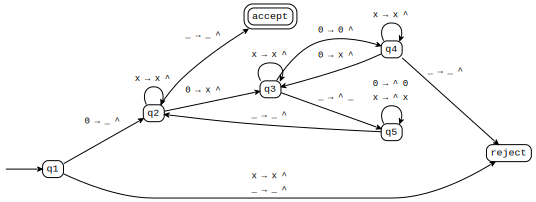

In [2]:
m = read_csv("tm-m2.csv")
m

Now we construct the formula corresponding to the run of this machine on `xx`:

In [3]:
phi = make_phi(m, ["x"]*2, 1)
print str(phi)

(x[1,1,q1] | x[1,1,q3] | x[1,1,q2] | x[1,1,q5] | x[1,1,q4] | x[1,1,#] | x[1,1,accept] | x[1,1,0] | x[1,1,reject] | x[1,1,x] | x[1,1,_]) & (~x[1,1,q1] | ~x[1,1,q3]) & (~x[1,1,q1] | ~x[1,1,q2]) & (~x[1,1,q1] | ~x[1,1,q5]) & (~x[1,1,q1] | ~x[1,1,q4]) & (~x[1,1,q1] | ~x[1,1,#]) & (~x[1,1,q1] | ~x[1,1,accept]) & (~x[1,1,q1] | ~x[1,1,0]) & (~x[1,1,q1] | ~x[1,1,reject]) & (~x[1,1,q1] | ~x[1,1,x]) & (~x[1,1,q1] | ~x[1,1,_]) & (~x[1,1,q3] | ~x[1,1,q1]) & (~x[1,1,q3] | ~x[1,1,q2]) & (~x[1,1,q3] | ~x[1,1,q5]) & (~x[1,1,q3] | ~x[1,1,q4]) & (~x[1,1,q3] | ~x[1,1,#]) & (~x[1,1,q3] | ~x[1,1,accept]) & (~x[1,1,q3] | ~x[1,1,0]) & (~x[1,1,q3] | ~x[1,1,reject]) & (~x[1,1,q3] | ~x[1,1,x]) & (~x[1,1,q3] | ~x[1,1,_]) & (~x[1,1,q2] | ~x[1,1,q1]) & (~x[1,1,q2] | ~x[1,1,q3]) & (~x[1,1,q2] | ~x[1,1,q5]) & (~x[1,1,q2] | ~x[1,1,q4]) & (~x[1,1,q2] | ~x[1,1,#]) & (~x[1,1,q2] | ~x[1,1,accept]) & (~x[1,1,q2] | ~x[1,1,0]) & (~x[1,1,q2] | ~x[1,1,reject]) & (~x[1,1,q2] | ~x[1,1,x]) & (~x[1,1,q2] | ~x[1,1,_]) & (~x[1,1,q5

That is a really big formula. How does the formula length depend on the input length?

In [4]:
phis = []
for n in range(10):
    phi = make_phi(m, ["x"]*n, 1)
    print n, len(str(phi))
    phis.append(phi)

0 127263
1 345280
2 667329
3 1093410
4 1623523
5 2257668
6 2995845
7 3872935
8 4896025
9 6054315


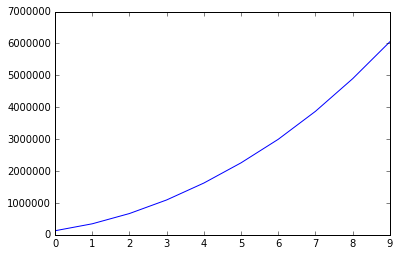

In [5]:
plt.plot(range(10), [len(str(phi)) for phi in phis])
plt.show()

## Wednesday reading

Read Section 7.5.

## Thursday class

Coming soon!